## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: VirProBERT

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [2]:
seaborn.__version__

'0.11.2'

In [30]:
import sys
import os
from pathlib import Path
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
# sys.path.append(os.path.join(os.getcwd(), "..", ".."))
# sys.path
INPUT_PATH = "/data/sipek/zoonosis/output/raw/uniprotkb_cd_hit_embl_vertebrates_non_idv_hev/20250331/host_multi/mlm_tfenc_l6_h8_lr1e-4_uniprotkb_hepeviridae_cd-hit_hybrid_attention_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-5_output.csv"
MY_PATH = "/data/sipek/zoonosis"
os.chdir("/home/sipek/zoonosis")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from src.utils import utils, evaluation_utils, visualization_utils

In [37]:
itr_col = "itr"
experiment_col = "experiment"
y_true_col = "y_true"

def cm_heatmap_analysis(output_filepaths, classes, figure_output_filepath):
    results = []
    all_classes = classes
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        df['experiment'] = df[classes].idxmax(axis=1)
        print(df.head())
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
        cm = confusion_matrix(df[y_true_col],df[experiment_col], labels = classes)
        plt.figure(figsize=(12,10))
        rows, cols = cm.shape
        print(cm)
        display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
        display.plot()
        plt.xlabel("True")
        plt.ylabel("Predicted")
        plt.show()
            
            
            
        
    return results

In [35]:
output_filepaths = {
    "VirProBERT": os.path.join(INPUT_PATH),
}
classes = ["Human","Swine", "Brown rat", "Wild boar", "Chevrier's field mouse" ]

Read output VirProBERT = (125, 7)
   Brown rat  Chevrier's field mouse     Human     Swine  Wild boar  \
0   0.927670                0.022831  0.000020  0.005640   0.043840   
1   0.032747                0.084278  0.669498  0.156840   0.056638   
2   0.053477                0.056268  0.461109  0.381875   0.047272   
3   0.032121                0.104759  0.616777  0.067928   0.178416   
4   0.074388                0.267000  0.402511  0.144360   0.111741   

      y_true  itr experiment  
0  Brown rat    0  Brown rat  
1      Human    0      Human  
2      Human    0      Human  
3      Human    0      Human  
4      Human    0      Human  
[[ 7  0  0  0  0]
 [ 0  4  0  1  0]
 [ 0  2  3  2  1]
 [ 0  1  0  9  0]
 [ 4  3 14  9 65]]


<Figure size 1200x1000 with 0 Axes>

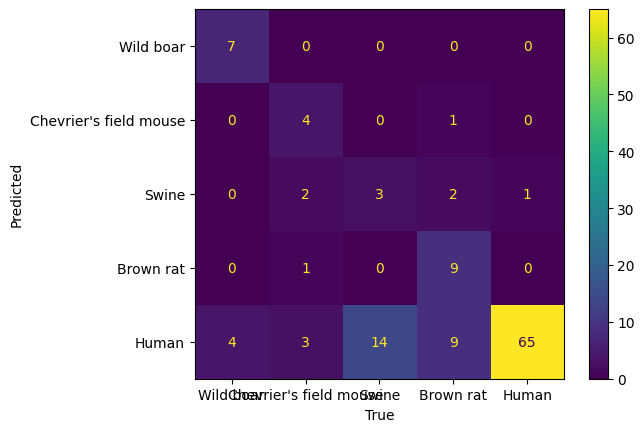

In [38]:
# figure_output_filepath = os.path.join(os.getcwd(), "..","..", "..", "..", "output/visualization/auprc_plots/0225/host_multi_all_models_classwise_aurpc_boxplot.pdf")
figure_output_filepath = os.path.join(MY_PATH, "output/visualization/cm_heatmap_plots/0325/host_multi_confusion-matrix_heatmap.pdf")
Path(os.path.dirname(figure_output_filepath)).mkdir(parents=True, exist_ok=True)
auprc_results_df = cm_heatmap_analysis(output_filepaths, classes, figure_output_filepath)

In [17]:
# auprc_results_macro = auprc_results_df[["model", "class", "auprc"]].groupby(["model", "class"]).mean("auprc")
# auprc_results_macro
# results_filepath = os.path.join(MY_PATH, "output/visualization/auprc_plots/033125/host_multi_weights_classwise_aurpc_macro.csv")
# auprc_results_macro.to_csv(results_filepath)